# Ensemble Learning using RF 
We will be using tree-based ensemble methods on the [Covertype dataset](https://www.openml.org/d/180).

In [43]:
%matplotlib inline
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [44]:
covertype = openml.datasets.get_dataset(180)
X, y, _, _ = covertype.get_data(target=covertype.default_target_attribute, dataset_format='array'); 
X = pd.DataFrame(X, columns=features)
classes = covertype.retrieve_class_labels()
features = [f.name for i,f in covertype.features.items()][:-1]

In [45]:
X.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,soil_type_31,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40
0,2754.0,146.0,5.0,150.0,2.0,1790.0,227.0,239.0,146.0,700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3219.0,21.0,8.0,67.0,-1.0,2869.0,215.0,223.0,145.0,1825.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2965.0,337.0,16.0,42.0,7.0,4288.0,184.0,217.0,171.0,324.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2368.0,14.0,15.0,150.0,65.0,1006.0,205.0,208.0,137.0,812.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2366.0,165.0,3.0,390.0,156.0,1165.0,222.0,240.0,154.0,582.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
classes

['Aspen',
 'Cottonwood_Willow',
 'Douglas_fir',
 'Krummholz',
 'Lodgepole_Pine',
 'Ponderosa_Pine',
 'Spruce_Fir']

## Exercise 1: Random Forests

Implement a function `evaluate_rf` that measures the performance of a Random Forest Classifier, using trees of (max) depth 2,8,32, for any number of trees in the ensemble (`n_estimators`). For each model, store the cross validation score based on k=3.


In [18]:
def evaluate_RF(X, y, n_estimators, max_depth=[2,8,32], scoring='accuracy'):
    res = {}
    for md in max_depth:
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=md, random_state=1)
        res['rf_'+str(md)] = np.mean(cross_val_score(rf,X,y,cv=3,scoring=scoring))
    return res

In [21]:
evaluate_RF(X, y, 10)

{'rf_2': 0.5982625293270181,
 'rf_8': 0.6911579005494498,
 'rf_32': 0.841276173919205}

## Exercise 2: Feature importance
Retrieve the feature importances according to the (tuned) random forest model. Which feature are most important?

In [29]:
RF = RandomForestClassifier(n_estimators=10, max_depth=32, random_state=1)
RF.fit(X,y)
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": RF.feature_importances_
})
importances = importances.sort_values("Importance", ascending=False)
importances

,Feature,Importance
0,elevation,0.224349
5,Horizontal_Distance_To_Roadways,0.106003
9,Horizontal_Distance_To_Fire_Points,0.095919
3,horizontal_distance_to_hydrology,0.063262
4,Vertical_Distance_To_Hydrology,0.061476
1,aspect,0.057609
7,Hillshade_Noon,0.054226
8,Hillshade_3pm,0.053462
6,Hillshade_9am,0.052411
2,slope,0.043362


Plot the results.

<AxesSubplot:ylabel='Feature'>

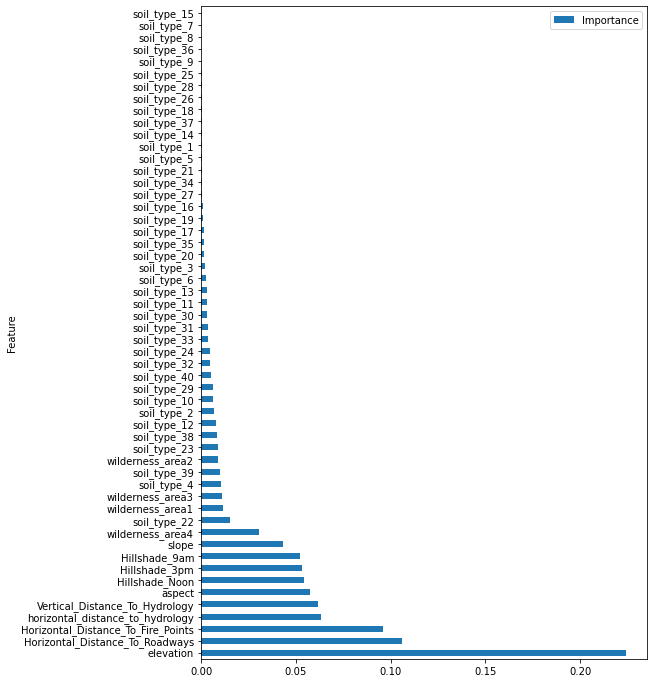

In [30]:
importances.set_index("Feature").plot(kind="barh", figsize=(8,12))

## Exercise 3: Feature selection
Re-build your tuned random forest, but this time only using the first 10 features.
Return both the balanced accuracy and training time. Interpret the results.

In [39]:
top_features = list(importances.head(20)["Feature"].values)
top_features

['elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'horizontal_distance_to_hydrology',
 'Vertical_Distance_To_Hydrology',
 'aspect',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Hillshade_9am',
 'slope',
 'wilderness_area4',
 'soil_type_22',
 'wilderness_area1',
 'wilderness_area3',
 'soil_type_4',
 'soil_type_39',
 'wilderness_area2',
 'soil_type_23',
 'soil_type_38',
 'soil_type_12']

In [40]:
# Model Solution
start = time.time()
score = evaluate_RF(X,y,25,max_depth=[32], scoring='balanced_accuracy')
print("Normal RF: {:.2f} balanced ACC, {:.2f} seconds".format(score['rf_32'], (time.time()-start)))
start = time.time()
score = evaluate_RF(X[top_features],y,25,max_depth=[32], scoring='balanced_accuracy')
print("Feature Selection RF: {:.2f} balanced ACC, {:.2f} seconds".format(score['rf_32'], (time.time()-start)))

Normal RF: 0.65 balanced ACC, 7.94 seconds
Feature Selection RF: 0.65 balanced ACC, 8.38 seconds


## Exercise 4: Confusion matrix
Do a standard stratified holdout and generate the confusion matrix of the tuned random forest. Which classes are still often confused?

In [41]:
# Model Solution
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=1)
tuned_forest = RandomForestClassifier(random_state=0, n_estimators=25, max_depth=32).fit(X_train, y_train)

In [42]:
# Model Solution
confusion_matrix(y_test, tuned_forest.predict(X_test))

array([[ 8475,  1059,    41,    20,    30,    23,    79],
       [  661, 12032,    73,    22,    35,    67,    31],
       [   83,   167,  1510,     8,    10,    55,    11],
       [   81,   114,    39,    81,     4,    12,     4],
       [  103,   250,    19,     3,   260,    11,     7],
       [   89,   173,   113,     5,     2,   600,    10],
       [  173,   121,    14,     2,    10,     8,   799]])

In [48]:
print(classification_report(y_test, tuned_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      9727
           1       0.86      0.93      0.90     12921
           2       0.83      0.82      0.83      1844
           3       0.57      0.24      0.34       335
           4       0.74      0.40      0.52       653
           5       0.77      0.60      0.68       992
           6       0.85      0.71      0.77      1127

    accuracy                           0.86     27599
   macro avg       0.79      0.65      0.70     27599
weighted avg       0.86      0.86      0.86     27599

